# Paper CHF - 32 beats

## Setup

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.metrics import specificity_score
import time

In [2]:
THREADS_TO_USE = 4

## Load dataset

In [3]:
data = pd.read_csv('../dataset/st_dataset_32beats.csv')
data = data.dropna()
data.head()

,id,dw_1,dw_2,dw_3,dw_4,dw_5,mfw_1,mfw_2,mfw_3,mfw_4,...,cfr_8,cfr_9,cfr_10,cfr_11,cfr_12,cfr_13,cfr_14,cfr_15,cfr_16,label
0,e0106,133.429003,134.242162,133.489322,37.853305,5.508392,0.586324,-0.522381,-0.788889,-0.136987,...,-0.042238,0.026644,-0.034630,0.040781,-0.065560,0.001347,-0.022417,-0.007807,-0.008983,NSR
1,e0106,133.965830,136.903950,136.743215,38.927755,5.696305,0.593533,-0.515953,-0.790798,-0.224475,...,-0.052676,0.042240,-0.050718,0.057318,-0.078975,0.010010,-0.026053,-0.011060,-0.004790,NSR
2,e0106,139.274723,140.184030,140.070259,39.704137,5.761162,0.577124,-0.518431,-0.807961,-0.219536,...,-0.051818,0.032123,-0.034994,0.042277,-0.076328,0.011880,-0.026580,-0.008271,-0.005162,NSR
3,e0106,138.676856,143.380168,143.473350,40.663806,5.859970,0.588245,-0.513443,-0.810437,-0.247007,...,-0.057101,0.036792,-0.033449,0.035388,-0.067010,0.008826,-0.025932,-0.011778,-0.000208,NSR
4,e0106,140.755171,142.872499,143.424214,40.769824,5.919625,0.585157,-0.517127,-0.798512,-0.176490,...,-0.031786,0.019955,-0.031716,0.039832,-0.068147,0.004500,-0.023807,-0.012157,-0.002940,NSR


In [4]:
data['label'].replace("ST-", "ST", inplace=True)
data['label'].replace("ST+", "ST", inplace=True)

In [5]:
data['label'].value_counts()

NSR    13090
ST      3982
Name: label, dtype: int64

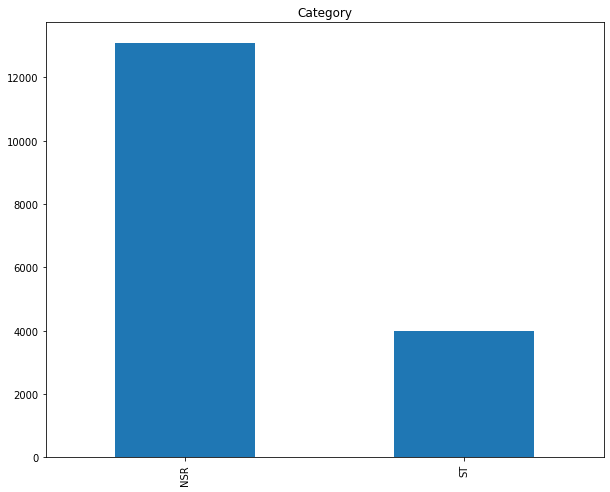

In [6]:
data['label'].value_counts().plot(kind='bar', title='Category', figsize=(10,8))
plt.show()

In [7]:
data.corr()

,dw_1,dw_2,dw_3,dw_4,dw_5,mfw_1,mfw_2,mfw_3,mfw_4,mfw_5,...,cfr_7,cfr_8,cfr_9,cfr_10,cfr_11,cfr_12,cfr_13,cfr_14,cfr_15,cfr_16
dw_1,1.000000,0.237685,0.106778,0.074513,0.049017,0.164754,-0.043134,0.066522,-0.005085,0.007374,...,-0.101746,-0.045780,-0.057627,-0.042941,-0.032342,-0.074357,-0.049488,-0.067248,-0.103371,-0.094220
dw_2,0.237685,1.000000,0.838142,0.502265,0.189472,0.396750,-0.511218,-0.362148,0.007304,0.027974,...,-0.110800,0.180227,0.237271,0.173162,0.054253,0.037079,0.134331,0.012952,-0.116243,-0.070422
dw_3,0.106778,0.838142,1.000000,0.702042,0.287089,0.241283,-0.555562,-0.499643,0.012774,0.016280,...,-0.199872,0.154880,0.275167,0.120954,-0.052022,0.066460,0.043879,-0.017784,-0.133008,-0.045069
dw_4,0.074513,0.502265,0.702042,1.000000,0.873295,-0.014716,-0.278260,-0.278962,0.008457,0.006416,...,-0.152384,0.071768,0.115122,0.067878,-0.039769,0.051749,0.026810,-0.031360,-0.111832,-0.044385
dw_5,0.049017,0.189472,0.287089,0.873295,1.000000,-0.124955,-0.026226,-0.049222,0.001954,0.000388,...,-0.063773,0.011881,-0.006932,0.044290,0.004779,0.016077,0.019832,-0.039655,-0.062702,-0.031614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cfr_12,-0.074357,0.037079,0.066460,0.051749,0.016077,-0.150115,0.112145,0.135231,-0.002228,0.004135,...,-0.135005,-0.212171,-0.056621,0.041745,0.071561,1.000000,0.024910,0.010580,-0.361983,-0.228896
cfr_13,-0.049488,0.134331,0.043879,0.026810,0.019832,0.073383,-0.006052,0.015178,0.006819,-0.001301,...,0.163738,0.044522,-0.209958,-0.266707,0.009957,0.024910,1.000000,0.238508,0.156749,-0.141656
cfr_14,-0.067248,0.012952,-0.017784,-0.031360,-0.039655,-0.001977,0.028472,0.029755,0.005549,-0.006743,...,0.121685,0.230485,0.039279,-0.173963,-0.282881,0.010580,0.238508,1.000000,0.221302,-0.128261
cfr_15,-0.103371,-0.116243,-0.133008,-0.111832,-0.062702,0.047377,0.081087,0.044183,0.001850,-0.014418,...,0.293341,0.157001,-0.089191,-0.138736,-0.062263,-0.361983,0.156749,0.221302,1.000000,0.344573


In [8]:
y = data['label'].values
X = data.loc[:, ~data.columns.isin(["id", "label"])].copy()
patient_ids = data["id"].values

In [9]:
label_encoder = LabelEncoder().fit(y)
y = label_encoder.transform(y)

## Feature selection

### exclude features with corr > 0.95

In [10]:
correlated_features = set()
correlation_matrix = X.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.95:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [11]:
print(correlated_features)

{'mfw_14', 'fft_164', 'fft_170', 'fft_197', 'fft_242', 'fft_253', 'fft_240', 'fft_146', 'fft_241', 'fft_194', 'fft_212', 'fft_187', 'fft_130', 'fft_249', 'fft_200', 'fft_172', 'mfw_12', 'fft_228', 'fft_137', 'fft_155', 'fft_175', 'fft_203', 'fft_227', 'mfw_10', 'fft_159', 'fft_207', 'fft_134', 'fft_173', 'fft_219', 'fft_248', 'fft_185', 'fft_250', 'fft_247', 'fft_153', 'fft_178', 'fft_229', 'fft_148', 'fft_183', 'fft_236', 'fft_154', 'fft_238', 'fft_256', 'fft_246', 'fft_158', 'fft_191', 'fft_149', 'fft_217', 'fft_150', 'fft_132', 'fft_161', 'fft_171', 'fft_169', 'fft_135', 'fft_254', 'fft_165', 'fft_174', 'fft_141', 'fft_166', 'fft_186', 'mfw_6', 'fft_226', 'fft_220', 'fft_143', 'fft_202', 'fft_139', 'fft_230', 'fft_243', 'fft_142', 'fft_160', 'fft_190', 'mfw_5', 'fft_179', 'fft_145', 'fft_151', 'fft_198', 'fft_221', 'fft_136', 'fft_205', 'fft_209', 'fft_140', 'fft_152', 'fft_196', 'fft_163', 'fft_181', 'fft_208', 'fft_233', 'fft_237', 'fft_251', 'fft_167', 'fft_157', 'fft_138', 'fft_

### Random forest embeded for features selection

In [12]:
cols_no_corr = [col for col in X.columns if col not in correlated_features]

In [13]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(random_state=101, n_jobs=THREADS_TO_USE), threshold='1.25*median')
embeded_rf_selector.fit(X[cols_no_corr], y)

SelectFromModel(estimator=RandomForestClassifier(n_jobs=4, random_state=101),
                threshold='1.25*median')

In [14]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X[cols_no_corr].loc[:,embeded_rf_support].columns.tolist()

print('\n'.join(embeded_rf_feature), '\nselected features:', len(embeded_rf_feature))

dw_1
dw_2
dw_3
dw_4
dw_5
mfw_1
mfw_2
mfw_3
mfw_4
fft_1
fft_2
fft_3
fft_4
fft_5
fft_6
fft_7
fft_8
fft_9
fft_10
fft_11
fft_12
fft_13
fft_14
fft_15
fft_16
fft_17
fft_18
fft_19
fft_20
fft_21
fft_22
fft_23
fft_25
fft_26
fft_29
fft_30
fft_32
fft_33
fft_34
fft_35
fft_36
fft_37
fft_38
ar_1
ar_2
ar_3
ar_4
ar_5
ar_6
ar_7
ar_8
ar_9
ar_10
ar_11
ar_12
ar_13
ar_14
ar_15
ar_16
var
cfr_1
cfr_2
cfr_3
cfr_4
cfr_5
cfr_6
cfr_7
cfr_8
cfr_9
cfr_10
cfr_11
cfr_12
cfr_13
cfr_14
cfr_15 
selected features: 75


### Visualization best features

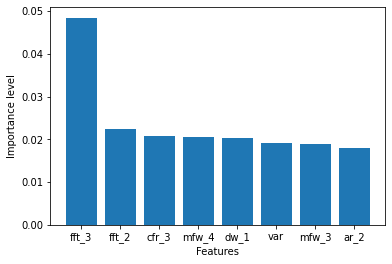

In [15]:
features_dict = dict(zip(cols_no_corr, embeded_rf_selector.estimator_.feature_importances_))
features_dict = dict(sorted(features_dict.items(), key=lambda item: item[1], reverse=True))

best_features = dict()
for index, (key, value) in enumerate(features_dict.items()):
    if index < 8:
        best_features[key] = value

plt.bar(range(len(best_features)), list(best_features.values()), align='center', )
plt.xticks(ticks=range(len(best_features)), labels=best_features.keys())
plt.xlabel('Features')
plt.ylabel('Importance level')
plt.show()

## Filter features

In [16]:
X_fsel = X[embeded_rf_feature]
X_fsel.head()

,dw_1,dw_2,dw_3,dw_4,dw_5,mfw_1,mfw_2,mfw_3,mfw_4,fft_1,...,cfr_6,cfr_7,cfr_8,cfr_9,cfr_10,cfr_11,cfr_12,cfr_13,cfr_14,cfr_15
0,133.429003,134.242162,133.489322,37.853305,5.508392,0.586324,-0.522381,-0.788889,-0.136987,-1.009483,...,0.017932,0.038860,-0.042238,0.026644,-0.034630,0.040781,-0.065560,0.001347,-0.022417,-0.007807
1,133.965830,136.903950,136.743215,38.927755,5.696305,0.593533,-0.515953,-0.790798,-0.224475,2.486222,...,0.014723,0.042961,-0.052676,0.042240,-0.050718,0.057318,-0.078975,0.010010,-0.026053,-0.011060
2,139.274723,140.184030,140.070259,39.704137,5.761162,0.577124,-0.518431,-0.807961,-0.219536,-2.150671,...,0.006243,0.051369,-0.051818,0.032123,-0.034994,0.042277,-0.076328,0.011880,-0.026580,-0.008271
3,138.676856,143.380168,143.473350,40.663806,5.859970,0.588245,-0.513443,-0.810437,-0.247007,-4.289119,...,0.014157,0.055342,-0.057101,0.036792,-0.033449,0.035388,-0.067010,0.008826,-0.025932,-0.011778
4,140.755171,142.872499,143.424214,40.769824,5.919625,0.585157,-0.517127,-0.798512,-0.176490,-1.067047,...,0.034652,0.022510,-0.031786,0.019955,-0.031716,0.039832,-0.068147,0.004500,-0.023807,-0.012157


## Random Forest - L1SO

In [17]:
cvds = X_fsel.copy()
cvds["patient_id"] = patient_ids
cvds["label"] = y

patients = np.unique(cvds["patient_id"].values)
patients

array(['e0106', 'e0110', 'e0115', 'e0129', 'e0133', 'e0151', 'e0202',
       'e0203', 'e0204', 'e0205', 'e0206', 'e0207', 'e0208', 'e0210',
       'e0211', 'e0212', 'e0213', 'e0302', 'e0303', 'e0304', 'e0305',
       'e0306', 'e0403', 'e0404', 'e0405', 'e0406', 'e0408', 'e0409',
       'e0410', 'e0411', 'e0413', 'e0415', 'e0417', 'e0418', 'e0515',
       'e0601', 'e0602', 'e0603', 'e0605', 'e0606', 'e0607', 'e0609',
       'e0610', 'e0611', 'e0612', 'e0613', 'e0614', 'e0615', 'e0704',
       'e0801', 'e0808', 'e0817', 'e0818', 'e1301', 'e1302', 'e1304'],
      dtype=object)

In [18]:
classes = np.unique(label_encoder.inverse_transform(y))

In [19]:
def eval_metrics(tp, tn, fp, fn):
    acc = (tp + tn) /(tp + tn + fp + fn)
    sens = tp / (tp+fn)
    spec = tn / (tn+fp)
    precision = tp / (tp+fp)
    recall = tp / (tp+fn)
    f1 = 2 * ((precision * recall) / (precision + recall))

    return acc, sens, spec, precision, recall, f1

In [20]:
result_df = pd.DataFrame()
tot = len(patients)
for i, patient in enumerate(patients):
    start_time = time.time()

    # Train and Test split
    df1 = cvds.loc[cvds["patient_id"] != patient]
    df2 = cvds.loc[cvds["patient_id"] == patient]

    y_train = df1["label"].values
    x_train = df1.loc[:, ~df1.columns.isin(['patient_id', 'label'])]
    y_test = df2["label"].values
    x_test = df2.loc[:, ~df2.columns.isin(['patient_id', 'label'])]

    # Training
    model = RandomForestClassifier(random_state=101, max_depth=6, n_jobs=THREADS_TO_USE).fit(x_train, y_train)

    # Prediction
    y_pred = model.predict(x_test)

    # Decode
    y_test_dec = label_encoder.inverse_transform(y_test)
    y_pred_dec = label_encoder.inverse_transform(y_pred)

    # get metrics
    report = classification_report(y_true=y_test_dec, y_pred=y_pred_dec, zero_division=1, output_dict=True)
    specificity = specificity_score(y_true=y_test_dec, y_pred=y_pred_dec, average="weighted")

    acc = report['accuracy']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']


    # save result in result_df
    result_df = result_df.append({
        "accuracy": acc,
        "specificity": specificity,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }, ignore_index=True)
    end_time = time.time()

    elapsed_seconds = end_time - start_time
    # Log result
    print("#---------------------#")
    print(i+1, "of", len(patients), "-", elapsed_seconds, "s")
    print("Accuracy", acc, "precision", precision, "specificity", specificity, "recall", recall, "f1", f1)
    print("#---------------------#")

#---------------------#
1 of 56 - 1.3299973011016846 s
Accuracy 0.8133333333333334 precision 0.8481777777777778 specificity 0.18666666666666668 recall 0.8133333333333334 f1 0.7296078431372549
#---------------------#
#---------------------#
2 of 56 - 1.3256807327270508 s
Accuracy 0.8054298642533937 precision 0.8432874019778466 specificity 0.19457013574660634 recall 0.8054298642533937 f1 0.7186291520656847
#---------------------#
#---------------------#
3 of 56 - 1.310516119003296 s
Accuracy 0.9211267605633803 precision 0.9273477484626066 specificity 0.07887323943661972 recall 0.9211267605633803 f1 0.8833092396018338
#---------------------#
#---------------------#
4 of 56 - 1.3140010833740234 s
Accuracy 0.8651685393258427 precision 0.8833480621133695 specificity 0.1348314606741573 recall 0.8651685393258427 f1 0.8026262352781914
#---------------------#


c:\users\marco\pycharmprojects\paper-st-sloping\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#---------------------#
5 of 56 - 1.4439983367919922 s
Accuracy 1.0 precision 1.0 specificity 0.0 recall 1.0 f1 1.0
#---------------------#


c:\users\marco\pycharmprojects\paper-st-sloping\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#---------------------#
6 of 56 - 1.4320199489593506 s
Accuracy 1.0 precision 1.0 specificity 0.0 recall 1.0 f1 1.0
#---------------------#
#---------------------#
7 of 56 - 1.4220013618469238 s
Accuracy 0.7124600638977636 precision 0.7951392787514419 specificity 0.28753993610223644 recall 0.7124600638977636 f1 0.5928305755567213
#---------------------#
#---------------------#
8 of 56 - 1.4300501346588135 s
Accuracy 0.7398119122257053 precision 0.8075097532453493 specificity 0.2601880877742947 recall 0.7398119122257053 f1 0.6291733740009603
#---------------------#
#---------------------#
9 of 56 - 1.404998779296875 s
Accuracy 0.9806629834254144 precision 0.9724907918968693 specificity 0.013734775678227092 recall 0.9806629834254144 f1 0.9765597910261449
#---------------------#
#---------------------#
10 of 56 - 1.4250006675720215 s
Accuracy 0.6525198938992043 precision 0.7732623180350245 specificity 0.34748010610079577 recall 0.6525198938992043 f1 0.5153126609926301
#-------------------

c:\users\marco\pycharmprojects\paper-st-sloping\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#---------------------#
36 of 56 - 1.395998477935791 s
Accuracy 1.0 precision 1.0 specificity 0.0 recall 1.0 f1 1.0
#---------------------#
#---------------------#
37 of 56 - 1.3969998359680176 s
Accuracy 0.8917378917378918 precision 0.9034585758232482 specificity 0.10826210826210826 recall 0.8917378917378918 f1 0.840704699138434
#---------------------#
#---------------------#
38 of 56 - 1.3320024013519287 s
Accuracy 0.048 precision 0.9543039999999999 specificity 0.952 recall 0.048 f1 0.0043969465648854966
#---------------------#
#---------------------#
39 of 56 - 1.4039971828460693 s
Accuracy 0.7622950819672131 precision 0.8187987100241871 specificity 0.23770491803278687 recall 0.7622950819672131 f1 0.6594738848646589
#---------------------#
#---------------------#
40 of 56 - 1.4350407123565674 s
Accuracy 0.8098360655737705 precision 0.8459983875302337 specificity 0.1901639344262295 recall 0.8098360655737705 f1 0.7247445949156569
#---------------------#
#---------------------#
41 of 5

c:\users\marco\pycharmprojects\paper-st-sloping\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#---------------------#
44 of 56 - 1.3360002040863037 s
Accuracy 1.0 precision 1.0 specificity 0.0 recall 1.0 f1 1.0
#---------------------#
#---------------------#
45 of 56 - 1.3220031261444092 s
Accuracy 0.6108597285067874 precision 0.3776223776223776 specificity 0.38178733031674206 recall 0.6108597285067874 f1 0.46672428694900603
#---------------------#
#---------------------#
46 of 56 - 1.328037977218628 s
Accuracy 0.753968253968254 precision 0.8144998740236835 specificity 0.24603174603174602 recall 0.753968253968254 f1 0.6482080011491776
#---------------------#
#---------------------#
47 of 56 - 1.2979991436004639 s
Accuracy 0.4649859943977591 precision 0.5519063214022811 specificity 0.5757808490006633 recall 0.4649859943977591 f1 0.41085933763004584
#---------------------#
#---------------------#
48 of 56 - 1.2820017337799072 s
Accuracy 0.9868421052631579 precision 0.9870152354570637 specificity 0.013157894736842105 recall 0.9868421052631579 f1 0.9803067270826071
#---------------

c:\users\marco\pycharmprojects\paper-st-sloping\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#---------------------#
49 of 56 - 1.2679991722106934 s
Accuracy 1.0 precision 1.0 specificity 0.0 recall 1.0 f1 1.0
#---------------------#


c:\users\marco\pycharmprojects\paper-st-sloping\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#---------------------#
50 of 56 - 1.3589978218078613 s
Accuracy 0.9966887417218543 precision 1.0 specificity 0.0 recall 0.9966887417218543 f1 0.9983416252072967
#---------------------#
#---------------------#
51 of 56 - 1.187283992767334 s
Accuracy 0.1271186440677966 precision 0.8933696070878275 specificity 0.8793122240994059 recall 0.1271186440677966 f1 0.03767363336447567
#---------------------#


c:\users\marco\pycharmprojects\paper-st-sloping\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#---------------------#
52 of 56 - 1.2770018577575684 s
Accuracy 0.9512195121951219 precision 1.0 specificity 0.0 recall 0.9512195121951219 f1 0.975
#---------------------#
#---------------------#
53 of 56 - 1.2660019397735596 s
Accuracy 0.7244582043343654 precision 0.8008545277432172 specificity 0.29751981764365665 recall 0.7244582043343654 f1 0.6147858296571297
#---------------------#
#---------------------#
54 of 56 - 1.2749998569488525 s
Accuracy 0.8613138686131386 precision 0.8805477116521924 specificity 0.1386861313868613 recall 0.8613138686131386 f1 0.797137541147846
#---------------------#
#---------------------#
55 of 56 - 1.300997018814087 s
Accuracy 0.9053030303030303 precision 0.9142705463728191 specificity 0.0946969696969697 recall 0.9053030303030303 f1 0.8603078498704742
#---------------------#
#---------------------#
56 of 56 - 1.300001859664917 s
Accuracy 0.7751004016064257 precision 0.8256802309640167 specificity 0.2248995983935743 recall 0.7751004016064257 f1 0.676897

In [21]:
result_df.head(10)

,accuracy,specificity,precision,recall,f1
0,0.813333,0.186667,0.848178,0.813333,0.729608
1,0.805430,0.194570,0.843287,0.805430,0.718629
2,0.921127,0.078873,0.927348,0.921127,0.883309
3,0.865169,0.134831,0.883348,0.865169,0.802626
4,1.000000,0.000000,1.000000,1.000000,1.000000
5,1.000000,0.000000,1.000000,1.000000,1.000000
6,0.712460,0.287540,0.795139,0.712460,0.592831
7,0.739812,0.260188,0.807510,0.739812,0.629173
8,0.980663,0.013735,0.972491,0.980663,0.976560
9,0.652520,0.347480,0.773262,0.652520,0.515313


In [22]:
print("######## Total ########")
print("Accuracy", result_df["accuracy"].mean())
print("Precision", result_df["precision"].mean())
print("Specificity",  result_df["specificity"].mean())
print("Recall",  result_df["recall"].mean())
print("F1",  result_df["f1"].mean())

result_df.to_csv('result/bin_32beats_l1so.csv')

######## Total ########
Accuracy 0.7611042805927298
Precision 0.8669917700406836
Specificity 0.23565810122599892
Recall 0.7611042805927298
F1 0.6972893082881761
